In [1]:
from google.colab import files
uploaded = files.upload()


Saving breast-cancer.csv to breast-cancer.csv


In [2]:
import pandas as pd

# Replace with your actual filename
df = pd.read_csv('breast-cancer.csv')

# View dataset info
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Drop ID or unnamed columns if any
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Encode target: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and labels
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


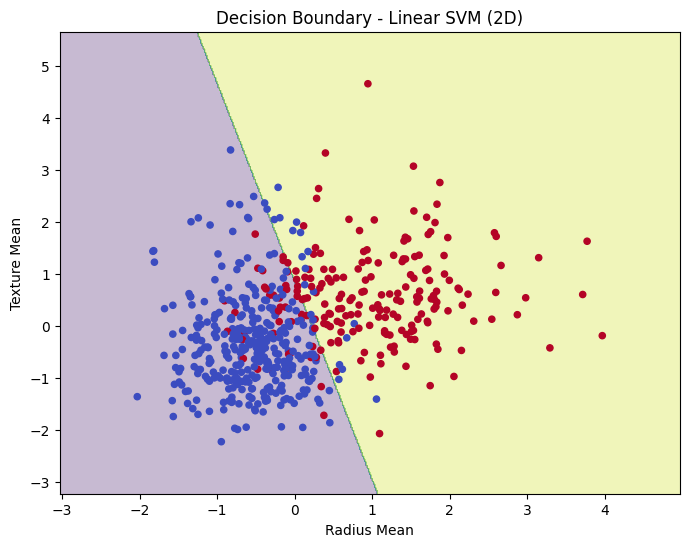

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


# Select two features for 2D plot
X_2d = df[['radius_mean', 'texture_mean']]
y_2d = df['diagnosis']

# Normalize
X_2d_scaled = StandardScaler().fit_transform(X_2d)

# Train a linear SVM on 2D
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_2d_scaled, y_2d)

# Create mesh grid
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y_2d, cmap='coolwarm', s=20)
plt.title("Decision Boundary - Linear SVM (2D)")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9789318428815401


In [7]:
from sklearn.model_selection import cross_val_score

# Evaluate the best model from grid search
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean CV Accuracy: 0.9789318428815401
